In [21]:
import pandas as pd
import glob
from altair import sample 
import natsort
from sklearn.metrics import roc_auc_score
import numpy as np

score_df_paths_bt = glob.glob('../scoring_results/BT/*')
score_df_paths_bt = natsort.natsorted(score_df_paths_bt)

score_df_paths_rand = glob.glob('../scoring_results/num_samples/*')
score_df_paths_rand = natsort.natsorted(score_df_paths_rand)
sample_nums_rand = list(range(1,31,1))

score_df_paths_self = glob.glob('../scoring_results/selfcheck_sample/*')
score_df_paths_self = natsort.natsorted(score_df_paths_self)
sample_nums_self = list(range(1,10,1))





In [22]:

def extract_label_and_scores(df:pd.DataFrame):

    df  = df[['qid','factuality','pr_score','re_score','f1_score','question']]
    
    label_and_scores = {
        'label':[],
        'pr':[],
        're':[],
        'f1':[]
    }
    
    # set data type
    # df['factuality'] = df['factuality'].astype(str)
    
    for i in range(df.shape[0]):
        df.iloc[i]['factuality'] = str(df.iloc[i]['factuality'])
    
    for i in range(df.shape[0]):
        labels = df.iloc[i]['factuality'].split(',')
        pr_scores = df.iloc[i]['pr_score'].split(',')
        re_scores = df.iloc[i]['re_score'].split(',')
        f1_scores = df.iloc[i]['f1_score'].split(',')
        
        labels = [1 - int(x) for x in labels]
        pr_scores = [float(x) for x in pr_scores]
        re_scores = [float(x) for x in re_scores]
        f1_scores = [float(x) for x in f1_scores]
        
        assert len(labels) == len(pr_scores), f"labels: {labels}, pr_scores: {pr_scores},i: {i},q: {df.iloc[i]['question']}"
        
        label_and_scores['label'].extend(labels)
        label_and_scores['pr'].extend(pr_scores)
        label_and_scores['re'].extend(re_scores)
        label_and_scores['f1'].extend(f1_scores)
    
    import numpy as np
    label_and_scores["label"] = np.array(label_and_scores["label"])
    label_and_scores["pr"] = np.array(label_and_scores["pr"])
    label_and_scores["re"] = np.array(label_and_scores["re"])
    label_and_scores["f1"] = np.array(label_and_scores["f1"])
    

    return label_and_scores


def calc_auc_roc(df:pd.DataFrame):
    
    label_and_scores = extract_label_and_scores(df.copy())

    roc_aucs = {
        'pr':roc_auc_score(label_and_scores['label'],label_and_scores['pr']),
        're':roc_auc_score(label_and_scores['label'],label_and_scores['re']),
        'f1':roc_auc_score(label_and_scores['label'],label_and_scores['f1']),
        "ave":roc_auc_score(label_and_scores['label'],(label_and_scores['pr'] + label_and_scores['re'] + label_and_scores['f1'])/3),
        'random' : roc_auc_score(label_and_scores['label'],np.random.rand(len(label_and_scores['label']))),
    }

    return roc_aucs['pr']



In [23]:
samples_vs_auc_bt = {}
samples_vs_auc_rand = {}
samples_vs_auc_self = {}
for i, path in enumerate(score_df_paths_bt):
    df = pd.read_csv(path)
    # print(f"length: {LENGTHS[i]}, auc: {calc_auc_roc(df.copy())}")
    auc = calc_auc_roc(df.copy())
    samples_vs_auc_bt[i+1] = auc
from pprint import pprint
pprint(samples_vs_auc_bt) 

for i, path in enumerate(score_df_paths_rand):
    df = pd.read_csv(path)
    # print(f"length: {LENGTHS[i]}, auc: {calc_auc_roc(df.copy())}")
    auc = calc_auc_roc(df.copy())
    samples_vs_auc_rand[sample_nums_rand[i]] = auc



pprint(samples_vs_auc_rand)

for i, path in enumerate(score_df_paths_self):
    df = pd.read_csv(path)
    # print(f"length: {LENGTHS[i]}, auc: {calc_auc_roc(df.copy())}")
    auc = calc_auc_roc(df.copy())
    
    try:
        samples_vs_auc_self[sample_nums_self[i]] = auc
    except:
        break
    
    

pprint(samples_vs_auc_self)

{1: 0.6557579318448883,
 2: 0.6982373678025853,
 3: 0.7072855464159812,
 4: 0.7172150411280847,
 5: 0.7150117508813161,
 6: 0.7187426556991775,
 7: 0.7132784958871915,
 8: 0.7121034077555816,
 9: 0.7089894242068155}
{1: 0.7087837837837838,
 2: 0.7227085781433608,
 3: 0.7192420681551117,
 4: 0.7183607520564042,
 5: 0.7180376028202116,
 6: 0.7224441833137485,
 7: 0.725117508813161,
 8: 0.7253231492361927,
 9: 0.7196827262044654,
 10: 0.7200352526439483,
 11: 0.7208578143360751,
 12: 0.7176263219741481,
 13: 0.7165687426556991,
 14: 0.7155699177438308,
 15: 0.7156874265569917,
 16: 0.717508813160987,
 17: 0.7195064629847238,
 18: 0.7198589894242068,
 19: 0.7221797884841363,
 20: 0.7239424206815511,
 21: 0.7246474735605171,
 22: 0.7220622796709752,
 23: 0.7232961222091657,
 24: 0.7235898942420681,
 25: 0.7242068155111633,
 26: 0.7244418331374852,
 27: 0.7230904817861339,
 28: 0.7230317273795535,
 29: 0.722737955346651,
 30: 0.7243243243243243}
{1: 0.46689189189189195,
 2: 0.468948296122209

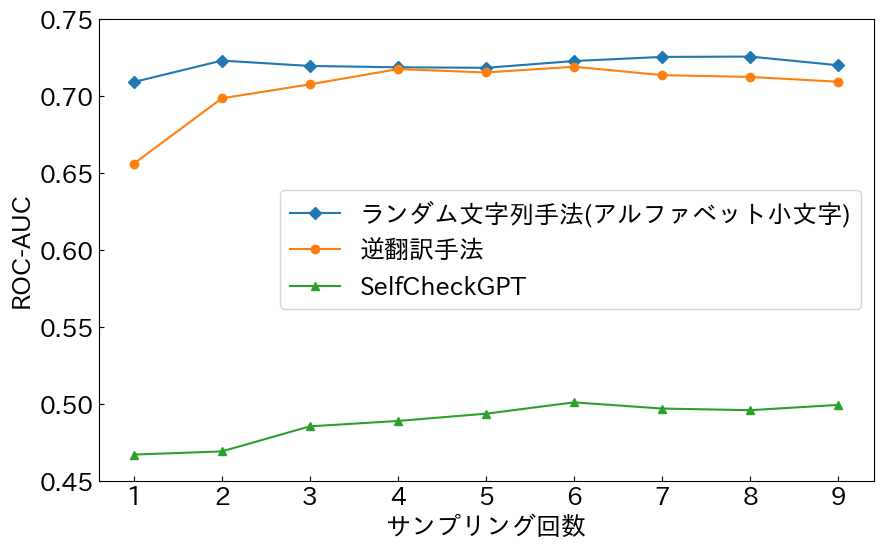

In [24]:
# graphにする
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# サンプル数を1-9としてplotする
samples_vs_auc_bt = {k: v for k, v in samples_vs_auc_bt.items() if k <= 9}
samples_vs_auc_rand = {k: v for k, v in samples_vs_auc_rand.items() if k <= 9}
samples_vs_auc_self = {k: v for k, v in samples_vs_auc_self.items() if k <= 9}

# Data
string_lengths_bt = samples_vs_auc_bt.keys()
roc_auc_values_bt =  samples_vs_auc_bt.values()


string_lengths_rand = samples_vs_auc_rand.keys()
roc_auc_values_rand =  samples_vs_auc_rand.values()

string_lengths_self = samples_vs_auc_self.keys()
roc_auc_values_self =  samples_vs_auc_self.values()


#上から性能いい順に凡例をつけると視線誘導できて分かりやすい
font_size = 18
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(string_lengths_rand, roc_auc_values_rand, marker='D',)
plt.plot(string_lengths_bt, roc_auc_values_bt, marker='o',)
plt.plot(string_lengths_self, roc_auc_values_self, marker='^',)
# plt.title('各種検出手法のサンプリング数による性能変化の推移', fontsize=font_size)
plt.xlabel('サンプリング回数', fontsize=font_size)
plt.ylabel('ROC-AUC', fontsize=font_size)
plt.xticks(fontsize=font_size, rotation=0)
plt.yticks([0.45,0.50,0.55,0.60,0.65,0.70,0.75], fontsize=font_size)
plt.ylim(0.45, 0.75)
# plt.grid(axis='y', linestyle='-', alpha=0.7)



plt.legend(['ランダム文字列手法(アルファベット小文字)', '逆翻訳手法','SelfCheckGPT'], fontsize=font_size)


# 最高性能のところを→で示す
# plt.annotate('AUC-ROC 0.714', xy=(600, 0.7147), xytext=(700, 0.71),
#              arrowprops=dict(facecolor='black', shrink=0.01,width=1),
#              fontsize=font_size / 1.3)



plt.show()


